# Tanzania Water Wells EDA


#### Management column explantation

- vwc: Remote sensors                 
- wug: Water User Groups                  
- water board: A board of people managing the wells         
- wua: Water Users Associations                  
- private operator: Privately owned     
- parastatal: Federal Ministry of Water Resources           
- water authority: The Water Authority's Mission is to: Assure responsive Customer Service     
- other                 
- company: company managed               
- unknown               
- other- school         
- trust         

- vwc:                 40507
- wug:                  6515
- water board:          2933
- wua:                  2535
- private operator:     1971
- parastatal:           1768
- water authority:       904
- other:                 844
- company:               685
- unknown:               561
- other - school:         99
- trust:                  78

## Regions and their wells

- Iringa:           5294
- Shinyanga:        4982
- Mbeya:            4639
- Kilimanjaro:      4379
- Morogoro:         4006
- Arusha:           3350
- Kagera:           3316
- Mwanza:           3102
- Kigoma:           2816
- Ruvuma:           2640
- Pwani:            2635
- Tanga:            2547
- Dodoma:           2201
- Singida:          2093
- Mara:             1969
- Tabora:           1959
- Rukwa:            1808
- Mtwara:           1730
- Manyara:          1583
- Lindi:            1546
- Dar es Salaam:     805

#### 21 unique subvilliages

In [1]:
import pandas as pd 
import numpy as np 

import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
cd "Data Set"


C:\Users\artur\Documents\Tanzania-wells----project_3\Data Set


In [3]:
data_X = pd.read_csv('X.csv')
data_y = pd.read_csv('y.csv')

In [4]:
data_X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
data_y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
print(data_y.shape)
print(data_X.shape)

(59400, 2)
(59400, 40)


In [7]:
data_water = data_X.merge(data_y, how='inner', on='id') 
print(data_water.shape)
data_water.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
data_water.drop(columns= ['id', 'funder', 'installer', 'num_private', 'scheme_management', 'scheme_name', 'permit', 'amount_tsh',
                         'waterpoint_type_group', 'source', 'region_code', 'district_code', 'management_group', 'payment_type',
                          'extraction_type', 'extraction_type_group', 'recorded_by', 'ward', 'lga', 'wpt_name', 'subvillage', 
                          'quantity_group', 'longitude', 'latitude', 'date_recorded', 'water_quality' ], axis=1, inplace=True)

In [9]:
print(data_water.isna().sum())
data_water.shape

gps_height                  0
basin                       0
region                      0
population                  0
public_meeting           3334
construction_year           0
extraction_type_class       0
management                  0
payment                     0
quality_group               0
quantity                    0
source_type                 0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64


(59400, 15)

In [15]:
data_water['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [17]:
data_water['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [18]:
data_water['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [20]:
data_water['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [21]:
data_water['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [22]:
data_water.population.mean()

179.90998316498317

In [23]:
data_water.population.hist()


In [24]:
data_water['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [25]:
variables = data_water.status_group.unique()
variables

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [26]:
dfs = {}

for variable in variables:
    frame = data_water[data_water.status_group == variable]
    dfs[variable] = frame

In [27]:
dfs['functional'].head()

,gps_height,basin,region,population,public_meeting,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,1390,Lake Nyasa,Iringa,109,True,1999,gravity,vwc,pay annually,good,enough,spring,groundwater,communal standpipe,functional
1,1399,Lake Victoria,Mara,280,NaN,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,686,Pangani,Manyara,250,True,2009,gravity,vwc,pay per bucket,good,enough,dam,surface,communal standpipe multiple,functional
4,0,Lake Victoria,Kagera,0,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
5,0,Pangani,Tanga,1,True,2009,submersible,vwc,pay per bucket,salty,enough,other,unknown,communal standpipe multiple,functional


In [28]:
var_region = data_water.region.unique()
var_region

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [29]:
df_region = {}

for x in var_region:
    frame_region = data_water[data_water.region == x]
    df_region[x] = frame_region
    


In [30]:
df_region['Iringa'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5294 entries, 0 to 59396
Data columns (total 15 columns):
gps_height               5294 non-null int64
basin                    5294 non-null object
region                   5294 non-null object
population               5294 non-null int64
public_meeting           5292 non-null object
construction_year        5294 non-null int64
extraction_type_class    5294 non-null object
management               5294 non-null object
payment                  5294 non-null object
quality_group            5294 non-null object
quantity                 5294 non-null object
source_type              5294 non-null object
source_class             5294 non-null object
waterpoint_type          5294 non-null object
status_group             5294 non-null object
dtypes: int64(3), object(12)
memory usage: 661.8+ KB


In [31]:
iringa = df_region['Iringa']
iringa_unclassified_construction_year = iringa.construction_year.value_counts(normalize=True)[0]
iringa_most_recent_construction_year = iringa.construction_year.value_counts(normalize=True)[2009]

In [32]:
iringa_unclassified_construction_year

0.0702682281828485

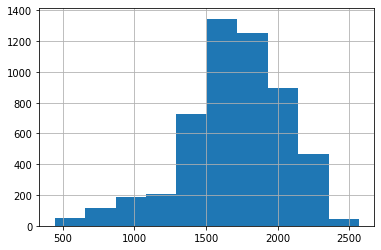

In [33]:
iringa.gps_height.hist()

## Construction Year 

### Iringa vs. Mbeya

>~11% of all wells in Iringa were constructed in the most recent year for which we have data. 7% of wells have an unknown construction year.

>Mbeya info here

INFO ABOUT THE DIFFERENCE IN WELL QUALITIY BETWEEN THESE TWO REGIONS.

PLOT DISTRIBUTIONS OF CONSTRUCTION YEAR FOR BOTH REGIONS

GRAPH OUT TREND OF WELL CONSTRUCTION OVER YEARS

In [34]:
df_region['Mbeya'].construction_year.value_counts()

0    4639
Name: construction_year, dtype: int64

In [35]:
construction = pd.DataFrame(data_water.construction_year.value_counts()[1:])
construction.index = pd.to_datetime(construction.index, format='%Y')

In [36]:
construction = construction.reset_index().sort_values(by='index')
construction = construction.set_index('index')

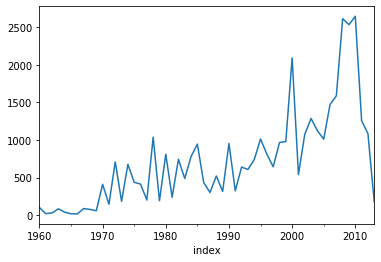

In [37]:
construction.construction_year.plot()

In [38]:
data_water['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [39]:
fr = dfs['functional']['region'].value_counts()
fr

Iringa           4141
Shinyanga        2789
Kilimanjaro      2640
Mbeya            2319
Arusha           2294
Morogoro         2119
Kagera           1727
Pwani            1556
Mwanza           1502
Ruvuma           1480
Tanga            1436
Kigoma           1363
Singida          1011
Dodoma           1009
Manyara           987
Mara              886
Tabora            848
Rukwa             707
Mtwara            524
Dar es Salaam     461
Lindi             460
Name: region, dtype: int64

In [40]:
nfr = dfs['non functional']['region'].value_counts()
nfr

Mbeya            1816
Morogoro         1587
Shinyanga        1558
Kilimanjaro      1417
Mwanza           1417
Kagera           1285
Mtwara           1080
Tabora           1066
Pwani            1043
Tanga            1038
Iringa           1030
Mara             1023
Ruvuma            996
Lindi             993
Dodoma            983
Rukwa             966
Singida           954
Arusha            881
Kigoma            850
Manyara           500
Dar es Salaam     341
Name: region, dtype: int64

In [41]:
fnrr = dfs['functional needs repair']['region'].value_counts()
fnrr

Shinyanga        635
Kigoma           603
Mbeya            504
Kilimanjaro      322
Kagera           304
Morogoro         300
Dodoma           209
Mwanza           183
Arusha           175
Ruvuma           164
Rukwa            135
Singida          128
Mtwara           126
Iringa           123
Manyara           96
Lindi             93
Tanga             73
Mara              60
Tabora            45
Pwani             36
Dar es Salaam      3
Name: region, dtype: int64

In [ ]:
fnrr_ratio = {}
nfr_ratio = {}
fr_ratio = {}

for ratio in fnrr:
    

In [100]:
data_water['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [46]:
data_water.groupby('region')['public_meeting'].sum()

region
Arusha           3075
Dar es Salaam     339
Dodoma           2192
Iringa           5012
Kagera           3277
Kigoma           2663
Kilimanjaro      3961
Lindi            1072
Manyara          1506
Mara              794
Mbeya            3914
Morogoro         3861
Mtwara           1672
Mwanza           2695
Pwani            2234
Rukwa            1419
Ruvuma           1897
Shinyanga        3761
Singida          1908
Tabora           1397
Tanga            2362
Name: public_meeting, dtype: int64

In [48]:
data_water[data_water['region']== 'Arusha']['public_meeting'].value_counts()

True     3075
False     237
Name: public_meeting, dtype: int64

# gps height and well functionality

In [53]:
data_water

,gps_height,basin,region,population,public_meeting,construction_year,extraction_type_class,management,payment,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,1392,Lake Nyasa,Iringa,109,True,1999,gravity,vwc,pay annually,good,enough,spring,groundwater,communal standpipe,functional
1,1401,Lake Victoria,Mara,280,NaN,2010,gravity,wug,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,688,Pangani,Manyara,250,True,2009,gravity,vwc,pay per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,265,Ruvuma / Southern Coast,Mtwara,58,True,1986,submersible,vwc,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional
4,2,Lake Victoria,Kagera,0,True,0,gravity,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1212,Pangani,Kilimanjaro,125,True,1999,gravity,water board,pay per bucket,good,enough,spring,groundwater,communal standpipe,functional
59396,1214,Rufiji,Iringa,56,True,1996,gravity,vwc,pay annually,good,enough,river/lake,surface,communal standpipe,functional
59397,2,Rufiji,Mbeya,0,True,0,handpump,vwc,pay monthly,fluoride,enough,borehole,groundwater,hand pump,functional
59398,2,Rufiji,Dodoma,0,True,0,handpump,vwc,never pay,good,insufficient,shallow well,groundwater,hand pump,functional


In [55]:
data_water['gps_height'].max()


2772

In [56]:
data_water['gps_height'].min()

-88

In [57]:
data_water['gps_height'].median()

371.0